# Final Exam - Classification


##Reference
* [Dataset](https://github.com/MicrosoftLearning/Principles-of-Machine-Learning-Python/tree/master/Final%20Exam)


## Import Libraries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from functools import reduce
from datetime import datetime
from sklearn import feature_selection as fs
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sklearn.model_selection as ms
import sklearn.metrics as sklm

### Read Data

In [108]:
Ave_Month = pd.read_csv('AW_AveMonthSpend.csv')
Adv_Works=pd.read_csv("AdvWorksCusts.csv")
BikeBuyer=pd.read_csv("AW_BikeBuyer.csv")
Testing=pd.read_csv("AW_test.csv")
print(Ave_Month.head(5))
print(Testing.head(5))
print(Adv_Works.head(5))
print(BikeBuyer.head(5))
print(Ave_Month.CustomerID.unique().shape)
print(Ave_Month.CustomerID.shape)
print(Adv_Works.CustomerID.unique().shape)
print(Adv_Works.CustomerID.shape)
print(BikeBuyer.CustomerID.unique().shape)
print(BikeBuyer.CustomerID.shape)
print(Testing.CustomerID.unique().shape)
print(Testing.CustomerID.shape)

   CustomerID  AveMonthSpend
0       11000             89
1       11001            117
2       11002            123
3       11003             50
4       11004             95
   CustomerID Title FirstName MiddleName  LastName Suffix  \
0       18988   NaN  Courtney          A     Baker    NaN   
1       29135   NaN      Adam          C     Allen    NaN   
2       12156   NaN    Bonnie        NaN      Raji    NaN   
3       13749   NaN     Julio          C    Alonso    NaN   
4       27780   NaN   Christy          A  Andersen    NaN   

             AddressLine1 AddressLine2        City StateProvinceName  ...  \
0   8727 Buena Vista Ave.          NaN     Fremont        California  ...   
1        3491 Cook Street          NaN       Haney  British Columbia  ...   
2    359 Pleasant Hill Rd          NaN     Burbank        California  ...   
3        8945 Euclid Ave.          NaN  Burlingame        California  ...   
4  42, boulevard Tremblay          NaN   Dunkerque              Nord  ... 

### Data Preparation

In [109]:
op=[Adv_Works,Ave_Month, BikeBuyer]
df_final_2 = reduce(lambda left,right: pd.merge(left,right,on='CustomerID',how='outer'), op)
df_final_2["Date_Birth"]=pd.to_datetime(df_final_2.BirthDate,infer_datetime_format=True)
age_constant= datetime.strptime("1/1/1998","%d/%m/%Y")
df_final_2["Age"] = (age_constant-df_final_2.Date_Birth).dt.days/365

In [110]:
df_final_3=df_final_2.copy(deep=True)
lis_na=[]
for a, b in enumerate(df_final_3.columns):
    if df_final_3[pd.isna(df_final_3[b])][b].shape[0]>=0.2*(df_final_3[b].shape[0]):
        lis_na.append(b)
        print(b)

Title
MiddleName
Suffix
AddressLine2


In [111]:
df_final_3=df_final_3.drop(columns=[x for x in lis_na])
d = defaultdict(LabelEncoder)

In [113]:
fit_0=df_final_3.drop(columns=["FirstName","LastName", "AddressLine1", 
                               "PostalCode", "PhoneNumber","BirthDate","Date_Birth","City"])
fit_0=fit_0.drop(columns=["CustomerID","StateProvinceName", "CountryRegionName",'BikeBuyer'])
fit_1= fit_0.select_dtypes(include="object").apply(lambda x: d[x.name].fit_transform(x))
fit=pd.concat([fit_1,fit_0.select_dtypes(exclude="object")], axis=1)

print(fit.columns)
print(fit_1.columns)
print(df_final_3.columns)
fit

Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'Age'],
      dtype='object')
Index(['Education', 'Occupation', 'Gender', 'MaritalStatus'], dtype='object')
Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer',
       'Date_Birth', 'Age'],
      dtype='object')


,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
0,0,3,1,0,1,0,0,2,137947,89,31.756164
1,0,3,1,1,0,1,3,3,101141,117,32.657534
2,0,3,1,0,1,1,3,3,91945,123,32.410959
3,0,3,0,1,0,1,0,0,86688,50,29.898630
4,0,3,0,1,1,4,5,5,92771,95,29.419178
5,0,3,1,1,1,1,0,0,103199,78,32.430137
6,0,3,0,1,1,1,0,0,84756,54,32.093151
7,0,3,1,0,1,2,3,3,109759,130,33.671233
8,0,3,0,1,1,3,4,4,88005,85,33.509589
9,0,3,1,1,0,1,0,0,106399,74,33.775342


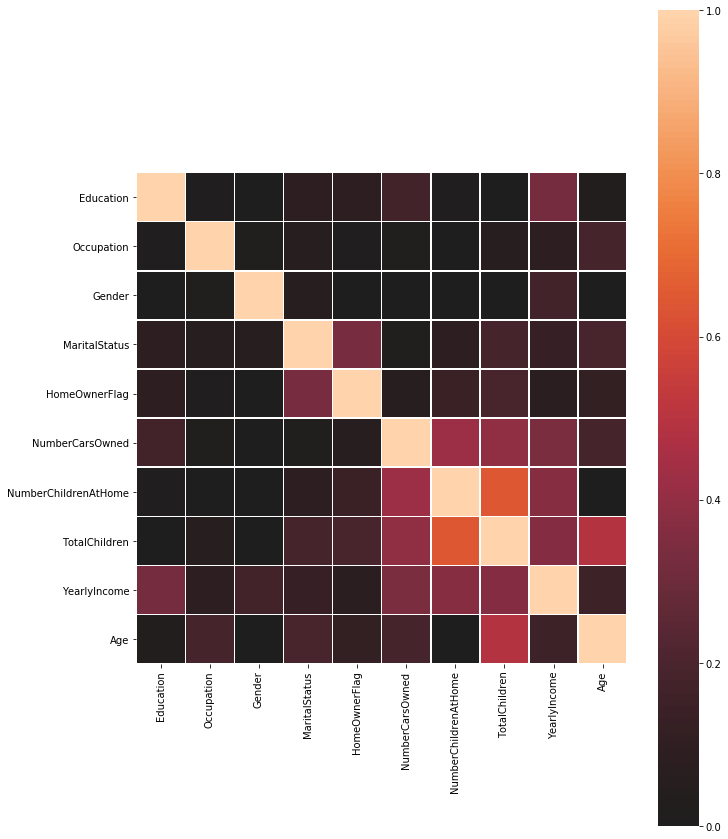

In [124]:
# plot the heatmap
corr_matrix = fit.corr().abs()

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      vmin = 0, 
                      vmax = 1, center=0)
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Machine Learning

In [115]:
#data preparation split
label=fit["AveMonthSpend"]
fit=fit.drop(columns=["AveMonthSpend"])
print(fit.shape)

(17209, 10)


In [125]:
fit_train, fit_test, label_train, label_test = ms.train_test_split(fit, label, test_size=0.2, random_state=42)

0         89
1        117
2        123
3         50
4         95
5         78
6         54
7        130
8         85
9         74
10        49
11       146
12        55
13        84
14        49
15        39
16        68
17        64
18        64
19        71
20        77
21        70
22        63
23        76
24        43
25        43
26        42
27        58
28        39
29        50
        ... 
17179     55
17180     38
17181     49
17182     44
17183     38
17184     42
17185     57
17186     55
17187     62
17188     66
17189     67
17190     67
17191     64
17192     64
17193     57
17194     53
17195     56
17196     69
17197     49
17198     45
17199     43
17200     64
17201     61
17202     48
17203     67
17204     65
17205     77
17206     48
17207     65
17208     72
Name: AveMonthSpend, Length: 17209, dtype: int64

In [117]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
    
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

In [118]:
# trying Neural network 
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100,),  
                                    activation='logistic',
                                       learning_rate='adaptive',
                                       max_iter=1000,
                                       learning_rate_init=0.001)
regressor.fit(fit_train,label_train)
scores = regressor.predict(fit_test)
print_metrics(label_test, scores, 14) 

Mean Square Error      = 782.2553156143118
Root Mean Square Error = 27.96882756953376
Mean Absolute Error    = 21.102033665626205
Median Absolute Error  = 18.478868156442672
R^2                    = -2.835686030433493e-07
Adjusted R^2           = -0.0037925833604326347


In [119]:

# trying Random Forest
from sklearn.ensemble import RandomForestRegressor
rand_regressor = RandomForestRegressor(n_estimators=40)
rand_regressor.fit(fit_train, label_train)
scores = rand_regressor.predict(fit_test)
print_metrics(label_test, scores, 14) 


Mean Square Error      = 10.943984170618256
Root Mean Square Error = 3.3081693080340155
Mean Absolute Error    = 2.569868077460501
Median Absolute Error  = 2.125
R^2                    = 0.9860096990643085
Adjusted R^2           = 0.9859566436640272


In [120]:

# trying Random Forest
from sklearn.ensemble import AdaBoostRegressor
ada_regressor = AdaBoostRegressor(n_estimators=40)
ada_regressor.fit(fit_train, label_train)
scores = ada_regressor.predict(fit_test)
print_metrics(label_test, scores, 14) 

Mean Square Error      = 44.85818226805433
Root Mean Square Error = 6.697625121493015
Mean Absolute Error    = 5.330870091570363
Median Absolute Error  = 4.476555023923446
R^2                    = 0.9426553018010508
Adjusted R^2           = 0.9424378335756756


In [121]:
Testing2=Testing
Testing2["Date_Birth"]=pd.to_datetime(Testing2.BirthDate,infer_datetime_format=True)
# (datetime(1998,1,1)-df_final_2.Date_Birth[0]).days/635
age_constant= datetime.strptime("1/1/1998","%d/%m/%Y")
Testing2["Age"] = (age_constant-Testing.Date_Birth).dt.days/365
Testing2=Testing2[['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age']]
Testing2

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,Bachelors,Management,F,S,0,2,0,5,86931,53.024658
1,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,33.265753
2,Graduate Degree,Management,F,M,1,2,0,4,103985,64.013699
3,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,39.304110
4,High School,Manual,F,M,1,1,2,2,21876,32.810959
5,Partial College,Clerical,F,M,1,1,0,1,44467,40.386301
6,Bachelors,Skilled Manual,M,S,1,2,2,4,77702,33.515068
7,Bachelors,Professional,M,M,1,3,4,4,99418,33.079452
8,Partial High School,Manual,M,S,1,1,4,4,13522,31.967123
9,Bachelors,Skilled Manual,F,M,1,1,1,1,46264,24.317808


### Use Best Model

In [122]:
Testing3= Testing2.select_dtypes(include="object").apply(lambda x: d[x.name].fit_transform(x))

Testing3=pd.concat([Testing3,Testing2.select_dtypes(exclude="object")], axis=1)

print(Testing3.columns)
print(fit_test.columns)

scores_final = rand_regressor.predict(Testing3)
np.savetxt('final_tes_answer_regression.csv', scores_final, delimiter=',',fmt='%f')

Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age'],
      dtype='object')
Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age'],
      dtype='object')
